In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
az.style.use('arviz-white')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [uk]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 33 seconds.
c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001934E573400>],
      dtype=object)

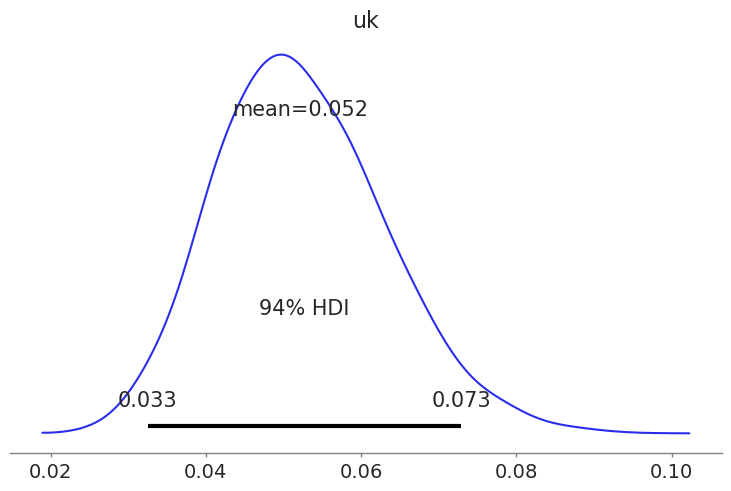

In [2]:
#  Find proportion of google earth entries in UK. Ans: 0.01%
observations = [0]*380+ [1]*20
uk_obs = sum(observations)
total_obs = len(observations)
#  Model
with pm.Model() as the_model:
    #  Prior.
	p_uk = pm.Uniform("uk",0,1)
    #  Likelihood.
	uk = pm.Binomial("likelihood", p=p_uk,n=total_obs, observed=uk_obs)
    #  Marcov Chain Monte Carlo. 
    #  Numbers of draws and chains. The more chains included, the more closely the distribution of sample matches actual distribution.
	trace_obs = pm.sample(10000,chains=2)
#  Posterior.
az.plot_posterior(trace_obs)
#  Posterior output:
#  mean: 5.2%.
#  94% HDI: 3.3%-7.4%.

In [3]:
inference_data = az.from_pymc3(trace_obs)

c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [4]:
az.summary(inference_data)

#  Create a data frame with summary statistics.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
uk,0.052,0.011,0.033,0.073,0.0,0.0,9028.0,9028.0,8739.0,12694.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019350A9B220>,
      dtype=object)

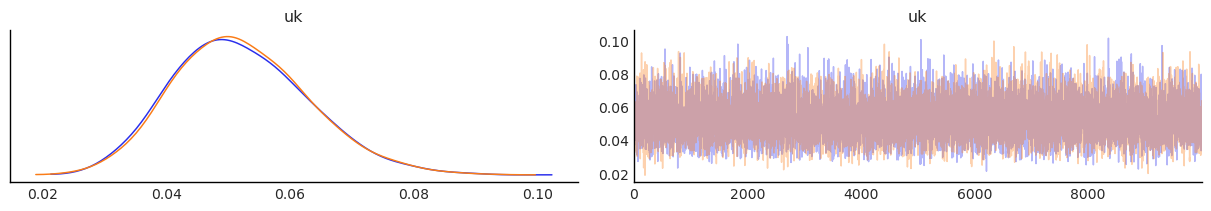

In [5]:
az.plot_trace(inference_data)

#  Produces a trace plot (time on x axis, the values taken by one of the coordinates of the draws on the y axis)
#  This one shows the MCMC sampling across the available sample space many times and settles quickly with no real issues. 
#  Can be used to check how the sampling procedure occured.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000193509C7040>,
      dtype=object)

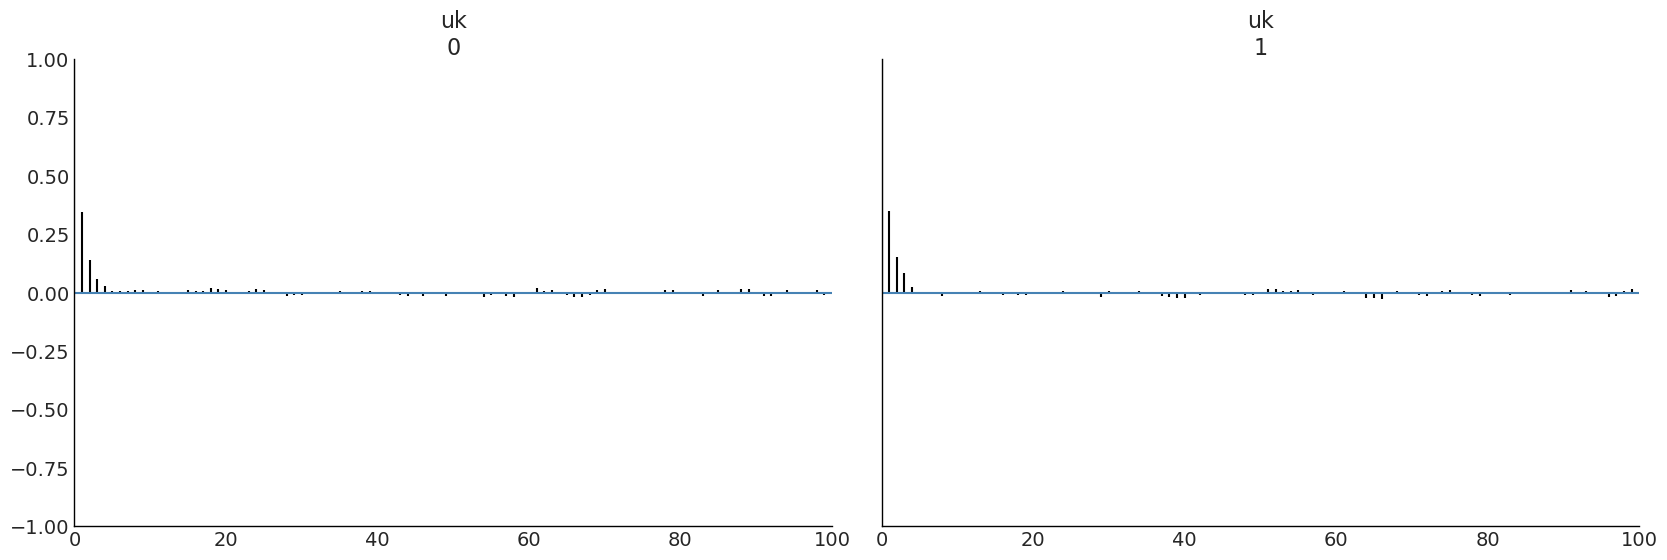

In [6]:
az.plot_autocorr(inference_data)

#  Bar plot of the autocorrelation function for a sequence of data.
#  Useful in particular for posteriors from MCMC samples which may display correlation.

c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019350A34AC0>],
      dtype=object)

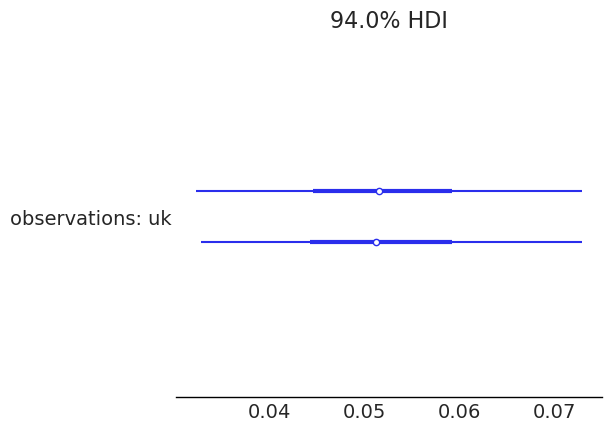

In [7]:
az.plot_forest([trace_obs], model_names=["observations"])

#  Forest plot to compare HDI intervals from a number of distributions.

#  More useful if plotting multiple results for comparison. 

In [8]:
inference_data.posterior 
#  stored our data in "inference_data" object earlier. 
#  in the object is:
#  - posterior data, 
#  - sample_stats data (stats around the sampling, explaining how well it worked...etc)
#  - observed_data

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 10000)
Coordinates:
  * chain    (chain) int32 0 1
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 9993 9994 9995 9996 9997 9998 9999
Data variables:
    uk       (chain, draw) float64 0.03434 0.07464 0.06009 ... 0.05403 0.06374
Attributes:
    created_at:                 2020-07-27T10:59:10.854627
    arviz_version:              0.9.0
    inference_library:          pymc3
    inference_library_version:  3.9.2
    sampling_time:              32.98545455932617
    tuning_steps:               1000

In [9]:
#  xarray lets us store inference run in a tidy package. 

In [10]:
#  Can also save it to disk, so it can be shared:
inference_data.to_netcdf("GoogleEarthResults.nc")

'GoogleEarthResults.nc'

In [11]:
#  load the data back using x=az.load_arviz_data(dataset="")